In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
data = pd.read_csv("D:/Downloads/query.csv")
print(data.head())


                       time  latitude  longitude  depth  mag magType  nst  \
0  2019-12-25T07:04:18.790Z   23.6610    96.0256  10.00  4.6      mb  NaN   
1  2019-12-22T14:59:31.805Z   23.6551    94.0597  10.00  3.8      mb  NaN   
2  2019-12-19T22:16:20.980Z   34.6953    79.7421  10.00  4.5      mb  NaN   
3  2019-12-19T12:07:55.485Z   32.4723    86.9509  10.00  4.9      mb  NaN   
4  2019-12-18T14:09:17.268Z   33.5899    71.6300  46.36  4.5      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0   64.0  1.676  0.61  ...  2020-03-14T22:24:59.040Z   
1  117.0  0.612  1.06  ...  2020-03-07T17:48:04.040Z   
2  109.0  5.466  0.75  ...  2020-03-07T17:47:36.040Z   
3   84.0  4.522  1.09  ...  2020-03-07T17:47:34.040Z   
4   91.0  1.368  0.69  ...  2021-06-23T01:28:30.664Z   

                         place        type horizontalError depthError  \
0  96 km NNW of Mogok, Myanmar  earthquake             7.3        1.9   
1  35 km W of Mawlaik, Myanmar  earthquake            

In [249]:
total_rows, total_columns = data.shape

print(f'Total Rows: {total_rows}')
print(f'Total Columns: {total_columns}')
print(data.info())

Total Rows: 3129
Total Columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3129 non-null   object 
 1   latitude         3129 non-null   float64
 2   longitude        3129 non-null   float64
 3   depth            3129 non-null   float64
 4   mag              3129 non-null   float64
 5   magType          3129 non-null   object 
 6   nst              1221 non-null   float64
 7   gap              3128 non-null   float64
 8   dmin             1907 non-null   float64
 9   rms              3128 non-null   float64
 10  net              3129 non-null   object 
 11  id               3129 non-null   object 
 12  updated          3129 non-null   object 
 13  place            3128 non-null   object 
 14  type             3129 non-null   object 
 15  horizontalError  1621 non-null   float64
 16  depthError       2575 non

In [250]:
null_values=data.isnull().sum();null_values

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1908
gap                   1
dmin               1222
rms                   1
net                   0
id                    0
updated               0
place                 1
type                  0
horizontalError    1508
depthError          554
magError           1241
magNst              295
status                0
locationSource        0
magSource             0
dtype: int64

In [251]:
missing_percentage = data.isnull().mean() * 100
print('Percentage of missing values:')
print(missing_percentage[['nst','gap','dmin','rms','place','horizontalError','depthError', 'magError','magNst']])

Percentage of missing values:
nst                60.977948
gap                 0.031959
dmin               39.054011
rms                 0.031959
place               0.031959
horizontalError    48.194311
depthError         17.705337
magError           39.661234
magNst              9.427932
dtype: float64


In [252]:
# Drop rows with missing values in 'gap' column
data.dropna(subset=['gap'], inplace=True)

# Drop rows with missing values in 'rms' column
data.dropna(subset=['rms'], inplace=True)

# Drop rows with missing values in 'rms' column
data.dropna(subset=['place'], inplace=True)

In [253]:
# Filter rows where 'magNst' column has missing values
missing_magNst = data[data['magNst'].isnull()]

# Select the 'place' column for the filtered rows
places_with_missing_magNst = missing_magNst['place']
print(places_with_missing_magNst)


780        Xizang-Qinghai border region
824           26 km W of Chauk, Myanmar
883          89 km NE of Lobujya, Nepal
921        76 km SE of Mawlaik, Myanmar
981            29 km W of Imph?l, India
                     ...               
3079            75 km N of Jumla, Nepal
3083      Nicobar Islands, India region
3085      Nicobar Islands, India region
3109      Nicobar Islands, India region
3125    145 km SW of Bamboo Flat, India
Name: place, Length: 294, dtype: object


In [254]:
def extract_country(place):
    if pd.notna(place) and ',' in str(place):
        return place.split(',')[1].strip()
    else:
        return str(place).strip()

data['country'] = data['place'].apply(extract_country)

print(data.head())

                       time  latitude  longitude  depth  mag magType  nst  \
0  2019-12-25T07:04:18.790Z   23.6610    96.0256  10.00  4.6      mb  NaN   
1  2019-12-22T14:59:31.805Z   23.6551    94.0597  10.00  3.8      mb  NaN   
2  2019-12-19T22:16:20.980Z   34.6953    79.7421  10.00  4.5      mb  NaN   
3  2019-12-19T12:07:55.485Z   32.4723    86.9509  10.00  4.9      mb  NaN   
4  2019-12-18T14:09:17.268Z   33.5899    71.6300  46.36  4.5      mb  NaN   

     gap   dmin   rms  ...                        place        type  \
0   64.0  1.676  0.61  ...  96 km NNW of Mogok, Myanmar  earthquake   
1  117.0  0.612  1.06  ...  35 km W of Mawlaik, Myanmar  earthquake   
2  109.0  5.466  0.75  ...     206 km ENE of Leh, India  earthquake   
3   84.0  4.522  1.09  ...               western Xizang  earthquake   
4   91.0  1.368  0.69  ...   16 km E of Kohat, Pakistan  earthquake   

  horizontalError depthError magError  magNst    status  locationSource  \
0             7.3        1.9    0.0

In [255]:
data['country'].unique()

array(['Myanmar', 'India', 'western Xizang', 'Pakistan', 'India region',
       'Nepal', 'Indonesia', 'China', 'near the south coast of Myanmar',
       'Bhutan', 'Bay of Bengal', 'Bangladesh',
       'Xizang-Qinghai border region', 'Eastern Xizang', 'Afghanistan',
       'Myanmar-India border region', 'Kashmir-India border region',
       'Thailand', 'Xizang-Nepal border region',
       'Xinjiang-Xizang border region',
       'western Xizang-India border region',
       'Kashmir-Xizang border region'], dtype=object)

In [256]:
# List of countries to keep
countries_to_keep = ['Myanmar', 'India', 'western Xizang', 'Pakistan', 'India region', 'Nepal', 
                     'Indonesia', 'China', 'Bhutan', 'Bay of Bengal', 'Bangladesh', 'Afghanistan', 
                     'Myanmar-India border region', 'Kashmir-India border region', 'Thailand']

# Filter rows based on the countries list
filtered_data = data[data['country'].isin(countries_to_keep)]
data=filtered_data

In [257]:
missing_percentage = data.isnull().mean() * 100
print('Percentage of missing values:')
print(missing_percentage[['nst','dmin','horizontalError','depthError', 'magError','magNst']])

Percentage of missing values:
nst                60.819091
dmin               39.180909
horizontalError    48.210255
depthError         17.865205
magError           39.793615
magNst              9.351822
dtype: float64


In [258]:
#removed the col nst because more than 50% missing data,removed type and status because was not imp  
data.drop(['nst','type','status'],axis=1,inplace=True)
data

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,id,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource,country
0,2019-12-25T07:04:18.790Z,23.6610,96.0256,10.00,4.6,mb,64.0,1.676,0.61,us,us70006quh,2020-03-14T22:24:59.040Z,"96 km NNW of Mogok, Myanmar",7.3,1.9,0.096,32.0,us,us,Myanmar
1,2019-12-22T14:59:31.805Z,23.6551,94.0597,10.00,3.8,mb,117.0,0.612,1.06,us,us70006x2s,2020-03-07T17:48:04.040Z,"35 km W of Mawlaik, Myanmar",4.2,2.0,0.511,1.0,us,us,Myanmar
2,2019-12-19T22:16:20.980Z,34.6953,79.7421,10.00,4.5,mb,109.0,5.466,0.75,us,us70006nu2,2020-03-07T17:47:36.040Z,"206 km ENE of Leh, India",8.7,1.9,0.093,34.0,us,us,India
3,2019-12-19T12:07:55.485Z,32.4723,86.9509,10.00,4.9,mb,84.0,4.522,1.09,us,us70006nf9,2020-03-07T17:47:34.040Z,western Xizang,6.3,1.8,0.052,116.0,us,us,western Xizang
4,2019-12-18T14:09:17.268Z,33.5899,71.6300,46.36,4.5,mb,91.0,1.368,0.69,us,us60006t6q,2021-06-23T01:28:30.664Z,"16 km E of Kohat, Pakistan",6.2,6.3,0.081,52.0,us,us,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,2008-11-16T12:25:09.150Z,10.8290,91.7010,35.00,4.6,mb,184.2,NaN,1.22,us,usp000gnu9,2014-11-07T01:37:44.735Z,"146 km SW of Bamboo Flat, India",NaN,NaN,NaN,3.0,us,us,India
3125,2008-11-16T12:20:36.880Z,10.8330,91.7110,26.70,5.5,mwc,25.8,NaN,0.97,us,usp000gnu8,2022-05-02T19:51:41.734Z,"145 km SW of Bamboo Flat, India",NaN,11.8,NaN,NaN,us,gcmt,India
3126,2008-11-16T11:37:40.000Z,10.8440,91.7850,39.10,4.6,mb,102.9,NaN,0.82,us,usp000gnu7,2014-11-07T01:37:44.717Z,"138 km SW of Port Blair, India",NaN,19.0,NaN,10.0,us,us,India
3127,2008-11-15T18:39:43.800Z,30.1080,83.4410,17.20,3.9,mb,145.4,NaN,1.38,us,usp000gnsa,2014-11-07T01:37:44.482Z,"152 km NE of Jumla, Nepal",NaN,36.9,NaN,5.0,us,us,Nepal


In [259]:
#close to zero, MCAR. otherwise MAR.
for col in ['dmin', 'horizontalError', 'depthError', 'magError', 'magNst']:
    data[col + '_missing'] = data[col].isnull().astype(int)

# Check the correlation between missingness of each variable and other columns
correlation_matrix = data.corr()
print(correlation_matrix)

                         latitude  longitude     depth       mag       gap  \
latitude                 1.000000  -0.570212 -0.167939 -0.155049  0.016809   
longitude               -0.570212   1.000000  0.268347  0.155941 -0.180225   
depth                   -0.167939   0.268347  1.000000  0.013753 -0.090873   
mag                     -0.155049   0.155941  0.013753  1.000000 -0.640703   
gap                      0.016809  -0.180225 -0.090873 -0.640703  1.000000   
dmin                     0.016067  -0.121929 -0.156490 -0.015803  0.038203   
rms                      0.122330  -0.179767 -0.081445 -0.010870 -0.018299   
horizontalError         -0.134543   0.028194  0.082406 -0.226116  0.354297   
depthError              -0.104808   0.056610  0.284861 -0.136965  0.109990   
magError                -0.071563  -0.062473  0.027014 -0.598739  0.591386   
magNst                   0.094806  -0.009022 -0.038385  0.590710 -0.479044   
dmin_missing            -0.124865   0.038207  0.037266  0.074461

<AxesSubplot:>

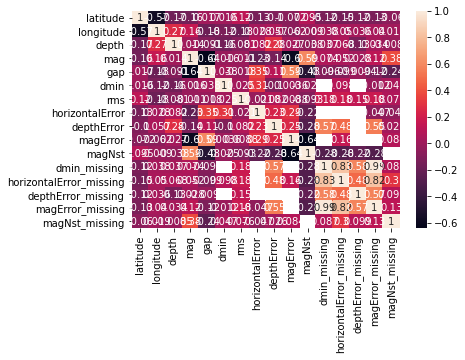

In [260]:
#'dmin_missing' and 'magError_missing'(MCAR),
#'horizontalError_missing', 'depthError_missing', and 'magNst_missing'(MAR)
# Visualize the relationship between missingness of each variable and other columns
sns.heatmap(correlation_matrix, annot=True)

In [261]:
#For dmin and magError they are independent of other variables
#missingness pattern IS be closer to (MCAR)
from sklearn.impute import KNNImputer
# Select the columns 'dmin', 'magError', for imputation
impute_data = data[['dmin', 'magError']]

# Initialize the KNNImputer with the number of neighbors (k)
knn_imputer = KNNImputer(n_neighbors=55)  

# Fit and transform the data to impute missing values
imputed_values = knn_imputer.fit_transform(impute_data)

# Replace the original 'dmin', 'magError', and 'depthError' columns with the imputed values
data['dmin'] = imputed_values[:, 0]
data['magError'] = imputed_values[:, 1]

# Now 'dmin' and 'magError' columns in the 'data' DataFrame will have missing values imputed using KNN


In [262]:
#knowing that an earthquake has a high "magnst" value might give more confidence in its reported parameters. so lets compute the missing values of nst which are 1908
''' Regression imputation is suitable when there are other variables in the dataset that are correlated with "magnst". If you have predictors that are strongly associated with "magnst", regression imputation can provide more accurate estimates than simple mean imputation. However, you need to ensure that the regression model is appropriate and does not suffer from issues such as multicollinearity.'''
#since magnst is positively correlated with  mag  therefore we use regression to compute the missing values
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your dataframe is named 'earthquake_data'
# Extracting rows with missing 'nst' values
missing_nst_data = data[data['magNst'].isnull()]

# Extracting rows with non-missing 'nst' values
non_missing_nst_data = data.dropna(subset=['magNst'])

# Selecting relevant features for the regression model
# You may need to choose appropriate features based on your data
features = ['latitude', 'longitude', 'depth', 'mag']

# Splitting data into features (X) and target variable (y)
X_train = non_missing_nst_data[features]
y_train = non_missing_nst_data['magNst']
X_test = missing_nst_data[features]

# Initialize and fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict missing 'nst' values
predicted_nst = regression_model.predict(X_test)

# Fill missing 'nst' values with predicted values
missing_nst_data['magNst'] = predicted_nst

# Update the original dataframe with imputed values
data.update(missing_nst_data)

# Print the updated dataframe
print(data)

                          time  latitude  longitude  depth  mag magType  \
0     2019-12-25T07:04:18.790Z   23.6610    96.0256  10.00  4.6      mb   
1     2019-12-22T14:59:31.805Z   23.6551    94.0597  10.00  3.8      mb   
2     2019-12-19T22:16:20.980Z   34.6953    79.7421  10.00  4.5      mb   
3     2019-12-19T12:07:55.485Z   32.4723    86.9509  10.00  4.9      mb   
4     2019-12-18T14:09:17.268Z   33.5899    71.6300  46.36  4.5      mb   
...                        ...       ...        ...    ...  ...     ...   
3124  2008-11-16T12:25:09.150Z   10.8290    91.7010  35.00  4.6      mb   
3125  2008-11-16T12:20:36.880Z   10.8330    91.7110  26.70  5.5     mwc   
3126  2008-11-16T11:37:40.000Z   10.8440    91.7850  39.10  4.6      mb   
3127  2008-11-15T18:39:43.800Z   30.1080    83.4410  17.20  3.9      mb   
3128  2008-11-15T09:35:50.830Z   12.9260    93.2870  35.00  3.8      mb   

        gap      dmin   rms net  ...  magError      magNst locationSource  \
0      64.0  1.676000 

<ipython-input-262-0b6ad7382511>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_nst_data['magNst'] = predicted_nst


In [263]:
import pandas as pd
import numpy as np

# Function to calculate Haversine distance between two sets of latitude and longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate missing values for horizontalError and depthError using Haversine formula
for index, row in data.iterrows():
    if pd.isnull(row['horizontalError']) or pd.isnull(row['depthError']):
        h_error = haversine(row['latitude'], row['longitude'], row['latitude'], row['longitude'])
        d_error = haversine(row['latitude'], row['longitude'], row['latitude'], row['longitude'])
        data.at[index, 'horizontalError'] = h_error
        data.at[index, 'depthError'] = d_error


In [264]:
data.drop(['net','locationSource','dmin_missing' ,'horizontalError_missing' ,'depthError_missing' ,'magError_missing','magNst_missing'],axis=1,inplace=True)

In [265]:
null_values=data.isnull().sum();null_values

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
gap                0
dmin               0
rms                0
id                 0
updated            0
place              0
horizontalError    0
depthError         0
magError           0
magNst             0
magSource          0
country            0
dtype: int64

In [266]:
# Save the updated dataset in an Excel CSV file
data.to_csv('cleaned_dataset.csv', index=False)